# DX 602 Final Project

## Introduction

In this project, you will practice the skills that you have learned throughout this module with a heavy focus on building models.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform build models, run a computation, or otherwise perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
The Thanksgiving holiday was also taken into account in setting the deadline.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [1]:
import math
import sys

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - red subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_red))
* [Body Fat](https://www.openml.org/search?type=data&status=active&id=560) ([PMLB](https://github.com/EpistasisLab/pmlb/tree/master/datasets/560_bodyfat))

The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the dataset has missing data, you should drop the rows with missing data before proceeding.
If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [3]:
red_wine_df = pd.read_csv("https://github.com/EpistasisLab/pmlb/raw/refs/heads/master/datasets/wine_quality_red/wine_quality_red.tsv.gz", sep="\t")
red_wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  target                1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
red_wine_df.sample(10, random_state=42)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
803,7.7,0.56,0.08,2.50,0.114,14.0,46.0,0.99710,3.24,0.66,9.6,6
124,7.8,0.50,0.17,1.60,0.082,21.0,102.0,0.99600,3.39,0.48,9.5,5
350,10.7,0.67,0.22,2.70,0.107,17.0,34.0,1.00040,3.28,0.98,9.9,6
682,8.5,0.46,0.31,2.25,0.078,32.0,58.0,0.99800,3.33,0.54,9.8,5
1326,6.7,0.46,0.24,1.70,0.077,18.0,34.0,0.99480,3.39,0.60,10.6,6
976,7.2,0.41,0.30,2.10,0.083,35.0,72.0,0.99700,3.44,0.52,9.4,5
1493,7.7,0.54,0.26,1.90,0.089,23.0,147.0,0.99636,3.26,0.59,9.7,5
706,7.0,0.78,0.08,2.00,0.093,10.0,19.0,0.99560,3.40,0.47,10.0,5
613,8.2,0.39,0.38,1.50,0.058,10.0,29.0,0.99620,3.26,0.74,9.8,5
1587,5.8,0.61,0.11,1.80,0.066,18.0,28.0,0.99483,3.55,0.66,10.9,6


Based on above info, There is no column with null values. Hence there is no need to drop any rows from this dataset. <br>
This dataset has 12 columns and 1599 rows. All the columns are float datatype

### Problem 2 (10 points)

List all of the columns and describe them in your own words.

In [5]:
red_wine_df_columns = red_wine_df.columns
print("Red Wine Columns : ", red_wine_df_columns.to_list(), "\n")
col_desc_dict = {"fixed acidity" : "Amount of non-volatile acids in the wine, measured in (g/L)",
"volatile acidity" : "Amount of gaseous acids, measured in (g/L)", 
"citric acid" : "Amount of citric acid in the wine, measured in (g/L)",
"residual sugar" : "Amount of sugar remaining after fermentation, measured in (g/L)",
"chlorides" : "Amount of salt in the wine, measured in (g/L)",
"free sulfur dioxide" : "Unbound form of SO2 acting as preservative, measured in (mg/L)",
"total sulfur dioxide" : "Total amount of free and bound forms of SO2 in the wine, measured in (mg/L)",
"density" : "mass per unit volume of the wine, measured in (g/cm3)",
"pH" : "Measure of the wine's acidity or basicity on the pH scale (0-14)",
"sulphates" : "Concentration of sulfur dioxide salts, measured in (g/L)",
"alcohol" : "Percentage of alcohol content in the wine, measured in (%vol)",
"target" : "Target variable, to measure the quality score of the wine on a scale of 3 to 8"}
for column in red_wine_df_columns:
    print(f"{column} : ", col_desc_dict.get(column), "\n")

Red Wine Columns :  ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'target'] 

fixed acidity :  Amount of non-volatile acids in the wine, measured in (g/L) 

volatile acidity :  Amount of gaseous acids, measured in (g/L) 

citric acid :  Amount of citric acid in the wine, measured in (g/L) 

residual sugar :  Amount of sugar remaining after fermentation, measured in (g/L) 

chlorides :  Amount of salt in the wine, measured in (g/L) 

free sulfur dioxide :  Unbound form of SO2 acting as preservative, measured in (mg/L) 

total sulfur dioxide :  Total amount of free and bound forms of SO2 in the wine, measured in (mg/L) 

density :  mass per unit volume of the wine, measured in (g/cm3) 

pH :  Measure of the wine's acidity or basicity on the pH scale (0-14) 

sulphates :  Concentration of sulfur dioxide salts, measured in (g/L) 

alcohol :  Percentage of alcohol co

In [31]:
print("Descriptive Statistics of the Red Wine Dataset", "\n")
print(red_wine_df.describe().T)
None

Descriptive Statistics of the Red Wine Dataset 

                       count       mean        std      min      25%  \
fixed acidity         1599.0   8.319637   1.741096  4.60000   7.1000   
volatile acidity      1599.0   0.527821   0.179060  0.12000   0.3900   
citric acid           1599.0   0.270976   0.194801  0.00000   0.0900   
residual sugar        1599.0   2.538806   1.409928  0.90000   1.9000   
chlorides             1599.0   0.087467   0.047065  0.01200   0.0700   
free sulfur dioxide   1599.0  15.874922  10.460157  1.00000   7.0000   
total sulfur dioxide  1599.0  46.467792  32.895324  6.00000  22.0000   
density               1599.0   0.996747   0.001887  0.99007   0.9956   
pH                    1599.0   3.311113   0.154386  2.74000   3.2100   
sulphates             1599.0   0.658149   0.169507  0.33000   0.5500   
alcohol               1599.0  10.422983   1.065668  8.40000   9.5000   
target                1599.0   5.636023   0.807569  3.00000   5.0000   

              

Description for each column and its descriptive statistics is provided above

### Problem 3 (50 points)

Perform an exploratory analysis of the data set.
After your exploratory analysis, pick 3 individual charts that you the think were particularly interesting.
Repeat those charts separately from your original analysis, and after each of those charts, explain what you thought was noteworthy.

In [7]:
red_wine_df_features = red_wine_df.drop("target", axis=1)
red_wine_df_target = red_wine_df["target"]

EDA #1 : hist plot distribution on the feature set


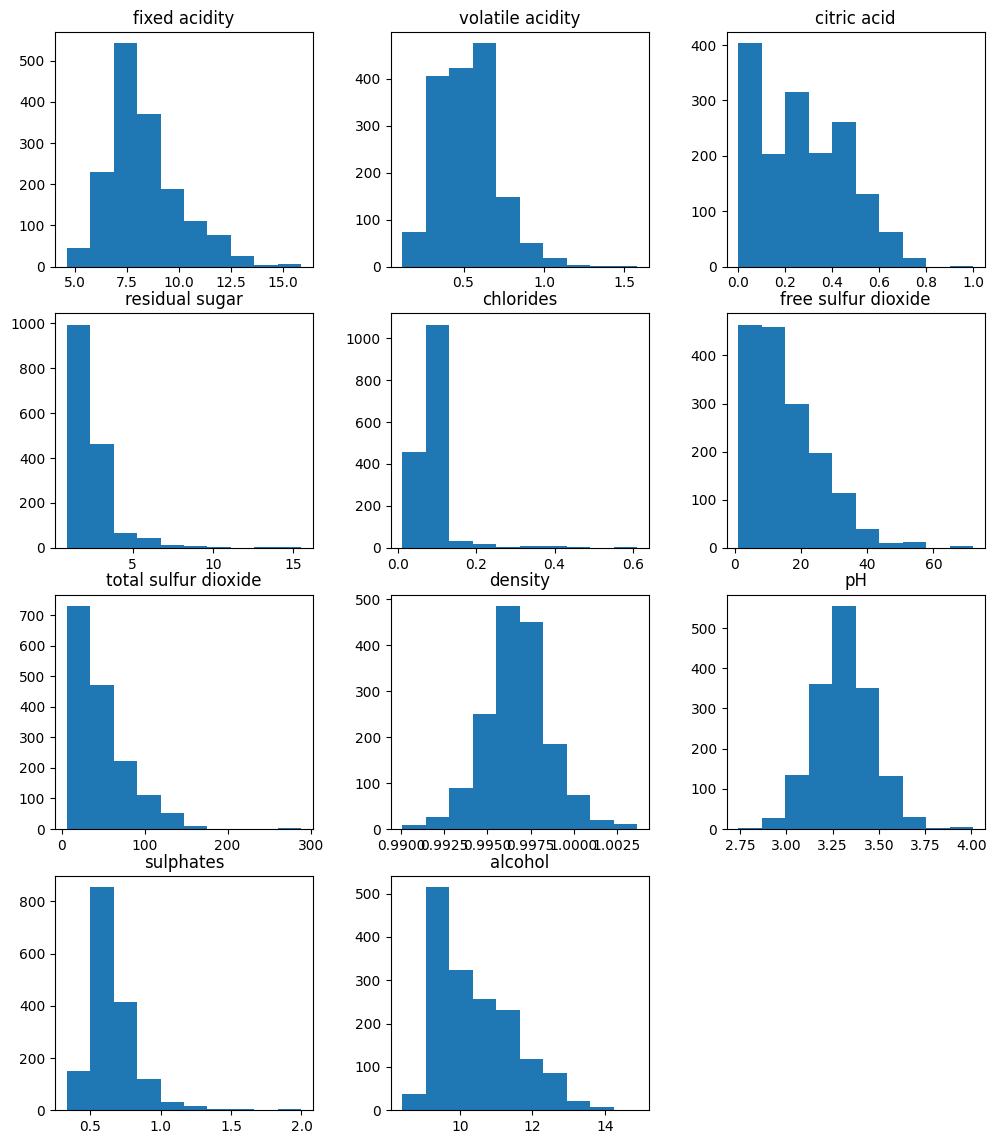

In [8]:
print("EDA #1 : hist plot distribution on the feature set")
num_cols=3
num_rows = (len(red_wine_df_features.columns) + num_cols-1) // num_cols
plt.figure(figsize=(num_cols*4, num_rows*3.5))
for (i, c) in enumerate(red_wine_df_features.columns):
    plt.subplot(num_rows, num_cols, i+1)
    red_wine_df_features[c].hist(grid=False)
    plt.title(c)
plt.subplots_adjust(wspace=0.3, hspace=0.2)
None

EDA #2 : Scatter plot matrix on the feature set seperated by target


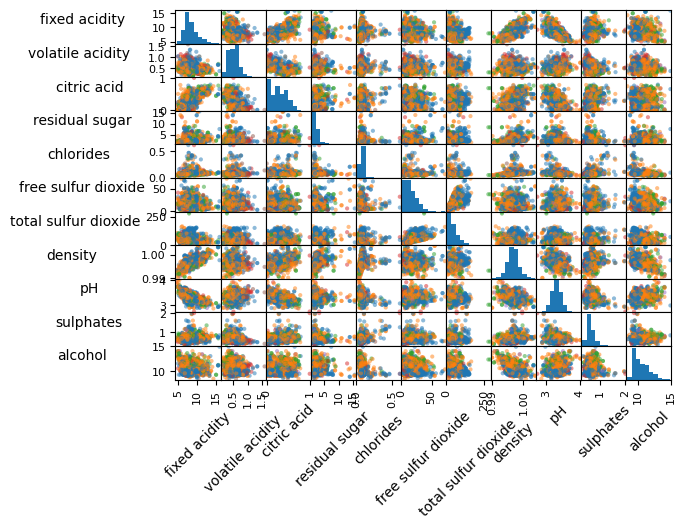

In [49]:
print("EDA #2 : Scatter plot matrix on the feature set seperated by target")
color_dict = dict(zip(red_wine_df["target"].unique(), plt.rcParams['axes.prop_cycle'].by_key()["color"]))
axes = pd.plotting.scatter_matrix(red_wine_df_features, color=red_wine_df["target"].map(color_dict))

for i, subaxis_row in enumerate(axes):
    for j, ax in enumerate(subaxis_row):
        ax.tick_params(axis='x', labelbottom=True)
        ax.xaxis.label.set_rotation(45)
        ax.tick_params(axis='y', labelleft=True)
        ax.yaxis.label.set_rotation(0)
        ax.yaxis.labelpad = 50

None

EDA #3 : Scatter plot distribution on the feature set seperated by target


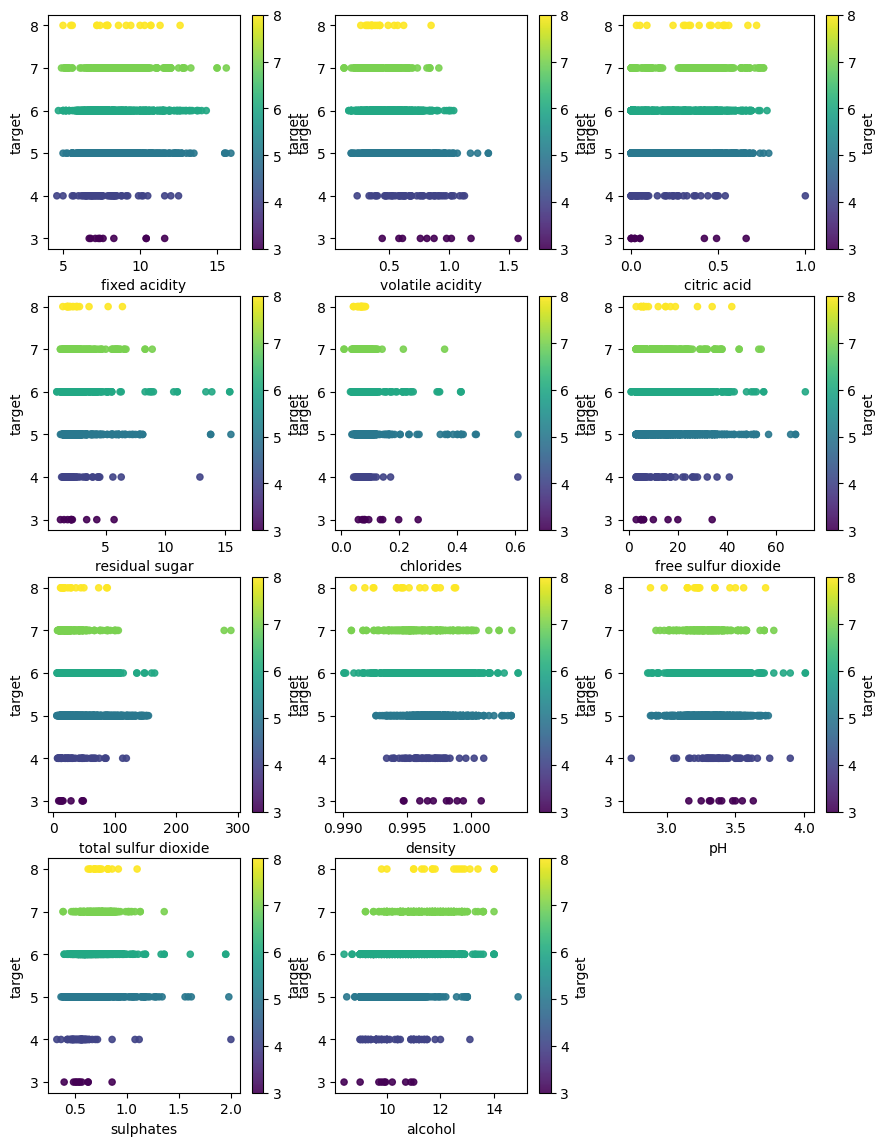

In [10]:
print("EDA #3 : Scatter plot distribution on the feature set seperated by target")
plot_cols = [c for c in red_wine_df.columns if c != 'target']
num_cols=3
num_rows = (len(plot_cols) + num_cols-1) // num_cols
plt.figure(figsize=(num_cols*3.5, num_rows*3.5))
for (i, c) in enumerate(plot_cols):
    plt.subplot(num_rows, num_cols, i+1)
    red_wine_df.plot.scatter(c, "target", alpha=0.9, ax=plt.gca(), c='target', colormap='viridis')
    plt.xlabel(c)
    plt.ylabel("target")

EDA #4 : Feature set distribution of mean value on the based by target


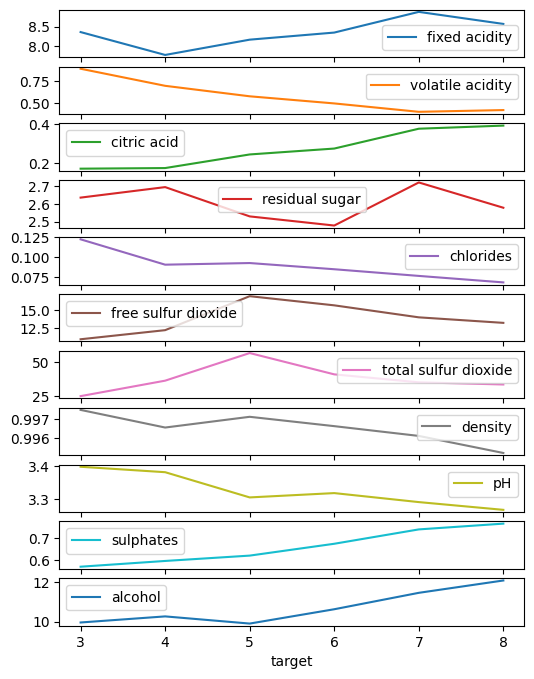

In [11]:
print("EDA #4 : Feature set distribution of mean value on the based by target")
red_wine_df.groupby("target").mean(numeric_only=True).plot(kind='line', subplots=True, figsize=(6,8))
None

EDA #5 : Target distribution


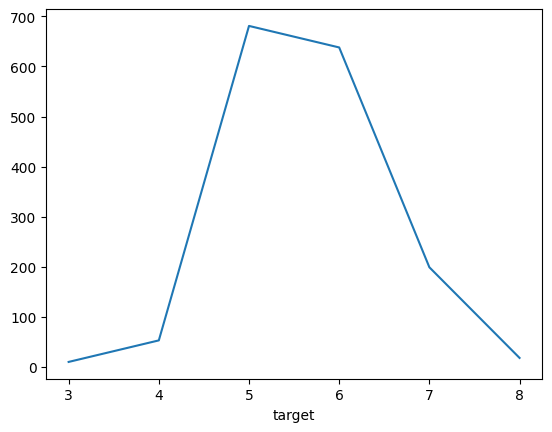

In [12]:
print("EDA #5 : Target distribution")
red_wine_df.groupby("target").size().plot()
None

In [54]:

print("EDA #5 : Correlation Matrix of the red wine dataset")
red_wine_df.corr(numeric_only=True)

EDA #5 : Correlation Matrix of the red wine dataset


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


YOUR ANSWERS HERE

### Problem 4 (5 points)

Plot the correlation matrix of the numeric columns in the data set.
Which pair of different columns were highlighted as the most correlated?

In [14]:
red_wine_df.corr(numeric_only=True)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


From this correlation matrix, highest positive correlation coefficient is observed between the 4 pair of columns mentioned below with an approximate value of 0.67
<ol>
<li>fixed acidity and density</li>
<li>fixed acidity and citric acid</li>
<li>free sulfur dioxide and total sulfur dioxide</li>
</ol>

### Problem 5 (10 points)

Pick three different regression model classes to try in problem 6 from the scikit-learn documentation.
For each class, provide a link to the scikit-learn documentation, and a link to another web page describing how that kind of model works.
The second link should not be from scikit-learn, but Wikipedia is acceptable.
You do not need to understand the methods at this time, but it is good to be comfortable researching them.

In [15]:
print("Model # 1 : Linear Regression")
print("Scikit-learn doc link : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html")
print("External link : https://www.datacamp.com/tutorial/sklearn-linear-regression")

print("\nModel # 2 : Random Forest Regressor")
print("Scikit-learn doc link : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html")
print("External link : https://www.geeksforgeeks.org/machine-learning/random-forest-regression-in-python/")

print("\nModel # 3 : Support Vector Regressor")
print("Scikit-learn doc link : https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html")
print("External link : ")


Model # 1 : Linear Regression
Scikit-learn doc link : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
External link : https://www.datacamp.com/tutorial/sklearn-linear-regression

Model # 2 : Random Forest Regressor
Scikit-learn doc link : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
External link : https://www.geeksforgeeks.org/machine-learning/random-forest-regression-in-python/

Model # 3 : Support Vector Regressor
Scikit-learn doc link : https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html
External link : 


For this analysis, I picked 3 models from different famililes.
<ol>
<li>Linear Regression - A simple statistical methodology used to find the best line of fit between two continuous variable. It is relatively a simple model used to conduct preliminary data analysis and predict future trends. The external link provided above gives a simple explanation on the underlying principle of linear regression along with house price prediction exmaple using the python sklearn package</li>
<li>Random Forest Regressor - Random forest is an ensemble learning that combines the predictions from multiple decision trees and gives the average of all those predictions. Internally it uses bootstrap sampling and feature sampling technique to produce a stable and accurate prediction. The external link provides a short explanation about Random Forest Technique followed by an example using python programming</li>
<li>Support Vector Regressor</li>
</ol>



### Problem 6 (50 points)

Build three different regression models using the entire data set.
Plot the actual target vs the predicted values for each in one chart.
Compute the L2 and L1 losses for each of them.
You may use any regression class provided provided by scikit-learn, and you may reuse one class as long as you change its parameters enough to see different results.

In [16]:
def mean_squared_error(eval_results, target):
    for model_name, results in eval_results.items():
        predictions = results.get("Predictions")
        error = target - predictions
        error_squared = error * error
        l2_loss = np.mean(error_squared)
        print(f"L2 loss for model {model_name} : {l2_loss:.3f}")


def mean_abs_error(eval_results, target):
    for model_name, results in eval_results.items():
        predictions = results.get("Predictions")
        error = target - predictions
        l1_loss = np.mean(np.abs(error))
        print(f"L1 loss for model {model_name} : {l1_loss:.3f}")


def eval_model(eval_models, features, target):
    model_eval_results = {}
    for model_name, model in eval_models.items():
        model.fit(X=features, y=target)
        r2_score = model.score(X=features, y=target)
        predictions = model.predict(X=features)
        model_eval_results.update({model_name: {"R2 Score": r2_score, "Predictions": predictions}})
    return model_eval_results


def plot_eval_results(eval_results, target):
    for model_name, results in eval_results.items():
        predictions = results.get("Predictions")
        r2_score = results.get("R2 Score")
        plt.scatter(target, predictions, color="green")
        plt.title(f"{model_name} Actual vs Predictions (R^2) = {r2_score:.2f}")
        plt.xlabel("Actual")
        plt.ylabel("Predictions")
        plt.show()

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

model_linear_regression = sklearn.linear_model.LinearRegression()
model_random_forest_regressor = RandomForestRegressor()
model_svr = SVR()
eval_models_dict = {"Linear Regression": model_linear_regression,
                       "Random Forest Regressor": model_random_forest_regressor,
                       "Support Vector Regressor": model_svr}
p6_evaluated_results = eval_model(eval_models_dict, red_wine_df_features, red_wine_df_target)

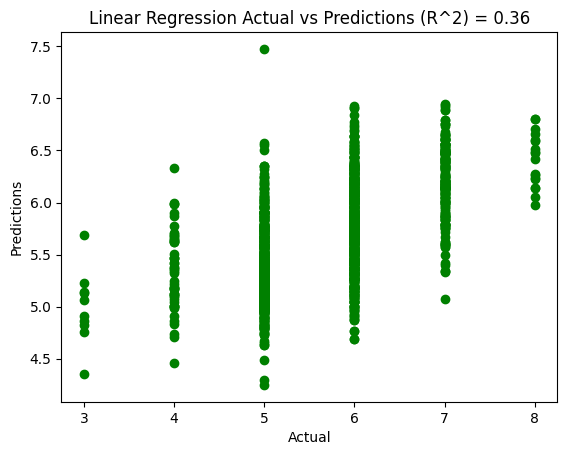

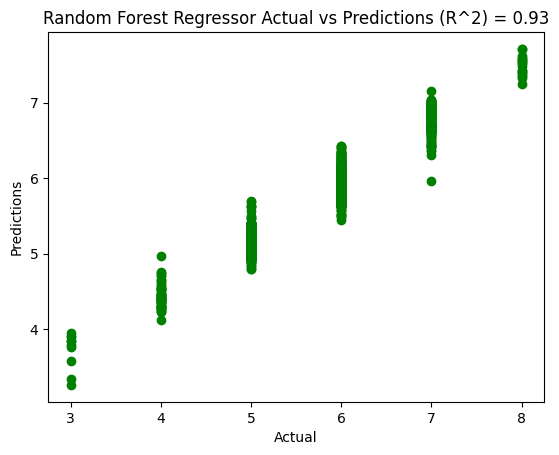

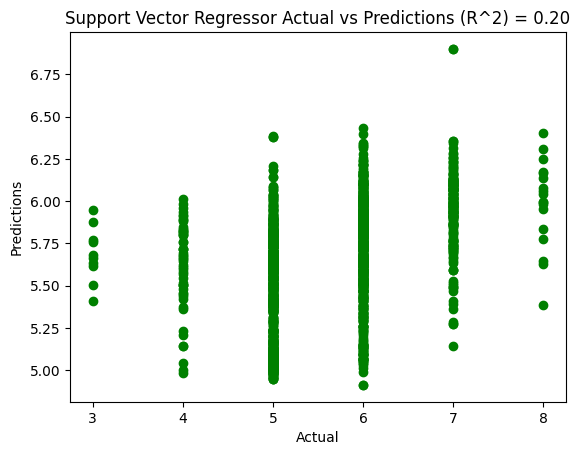

In [18]:
plot_eval_results(p6_evaluated_results, red_wine_df_target)

In [19]:
mean_abs_error(p6_evaluated_results, red_wine_df_target)

L1 loss for model Linear Regression : 0.500
L1 loss for model Random Forest Regressor : 0.148
L1 loss for model Support Vector Regressor : 0.546


In [20]:
mean_squared_error(p6_evaluated_results, red_wine_df_target)

L2 loss for model Linear Regression : 0.417
L2 loss for model Random Forest Regressor : 0.044
L2 loss for model Support Vector Regressor : 0.523


Out of all the 3 models Random Forest Regressor seems to have peformed better than the other two as it has memorized the entire dataset and accounts for strong overfitting.<br>
As these three models were trained and tested on the entire dataset, their predictions would be little worse when tested with new data points.<br>
<b>Note</b> : Rounded off the L1 & L2 results to 3 decimal places for better reading

### Problem 7 (30 points)

Use 5-fold cross-validation to repeat building the same three kinds of regression models. Compare the L2 losses predicted by cross-validation against the L2 losses training against the whole data set. (The difference is likely from overfitting in the latter.)

In [21]:
from sklearn.model_selection import cross_validate

def eval_model_cv(eval_models, features, target):
    model_eval_results = {}
    metrics = ['neg_mean_squared_error']
    for model_name, model in eval_models.items():
        cv_eval_result = cross_validate(estimator=model, X=features, y=target, cv=5, scoring=metrics)
        mse_result = -cv_eval_result['test_neg_mean_squared_error']
        model_eval_results.update({model_name: {"mse": np.mean(mse_result)}})
    return model_eval_results   

In [22]:
p7_evaluated_results = eval_model_cv(eval_models_dict, red_wine_df_features, red_wine_df_target)

for model_name, mse_results in p7_evaluated_results.items():
    l2_loss = mse_results.get("mse")
    print(f"L2 loss for model {model_name} : {l2_loss:.3f}")

L2 loss for model Linear Regression : 0.437
L2 loss for model Random Forest Regressor : 0.422
L2 loss for model Support Vector Regressor : 0.567


Based on the L2 loss, Linear Regression and SVR has a slight increase in L2 loss, whereas Random Forest has a sharp increase of almost <b>100</b> times when trained & tested with different dataset multiple times. This clearly shows that there is a significant improvement in avoiding the overfitting issue

### Problem 8 (25 points)

Build three different regression models as in problem 6, but preprocess the data so that each column has mean zero and standard deviation one first.
For full credit, use a scikit-learn pipeline for each model.
For each model, compare the L2 losses -- which of them performed differently from your results in problem 6?

(This process will be covered in week 13.)

In [23]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

rwd_train_features, rwd_test_features, \
        rwd_train_target, rwd_test_target = train_test_split(red_wine_df_features, red_wine_df_target,
                                                             test_size=0.2, random_state=42)

def eval_model(eval_models, train_features, train_target, test_features):
    model_eval_results = {}

    for model_name, model in eval_models.items():
        pipeline = make_pipeline(StandardScaler(), model)
        pipeline.fit(X=train_features, y=train_target)
        r2_score = pipeline.score(X=train_features, y=train_target)
        predictions = pipeline.predict(X=test_features)
        model_eval_results.update({model_name: {"R2 Score": r2_score, "Predictions": predictions}})
    return model_eval_results

In [24]:
p8_evaluated_results = eval_model(eval_models_dict, rwd_train_features, rwd_train_target, rwd_test_features)
mean_squared_error(p8_evaluated_results, rwd_test_target)

L2 loss for model Linear Regression : 0.390
L2 loss for model Random Forest Regressor : 0.315
L2 loss for model Support Vector Regressor : 0.351


Linear Regression & SVR performed better with scaling and traing/testing on a different dataset by bringing down their L2 losses. But <b>Random Forest</b> has performed <b>entirely different</b> by having a increasing in the L2 loss compared to problem 6 results as it has reduced the overfitting issue with scaling and traing/testing on a different dataset
<br><b>Note</b> : Rounded off the L2 results to 3 decimal places for better reading and to match the decimal pos with problem#6 results

### Problem 9 (5 points)

A colleague suggests that you find better models by repeatedly building decision trees with random depth limits.
They say that trying 1000 such models will likely find an improvement as long as you use cross validation.
Give a one sentence response to this suggestion. 

In [25]:
print("This approach is Random Forest regressor modelling and I feel it is better to go with this \n" \
"approach rather than picking and testing 1000 different models")

This approach is Random Forest regressor modelling and I feel it is better to go with this 
approach rather than picking and testing 1000 different models


This approach is Random Forest regressor modelling and I feel it is better to go with this approach rather than picking and testing 1000 different models

### Problem 10 (10 points)

Pick a best model from all the models that you built and otherwise described in this project.
Explain how you picked it, including what criteria you chose, and how the other models compared by that criteria.
As much as possible, justify that problem in the context of the original data set. 

In [26]:
# YOUR CODE HERE

YOUR ANSWERS HERE